## Black Friday - AV HACAKTHON


In [1]:
# importing the essential libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import norm, skew

from sklearn import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')

In [2]:
# reading the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


### Step1: Exploratory Data Analysis

In [4]:
# saving the id features which will be used later
test_user_Id = test.User_ID
test_product_Id = test.Product_ID

In [5]:
# shape of data
print(train.shape)
print(test.shape)

(550068, 12)
(233599, 11)


In [6]:
# checking the null values presence
train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [7]:
# overview of the data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [8]:
# statistical significance of the data
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


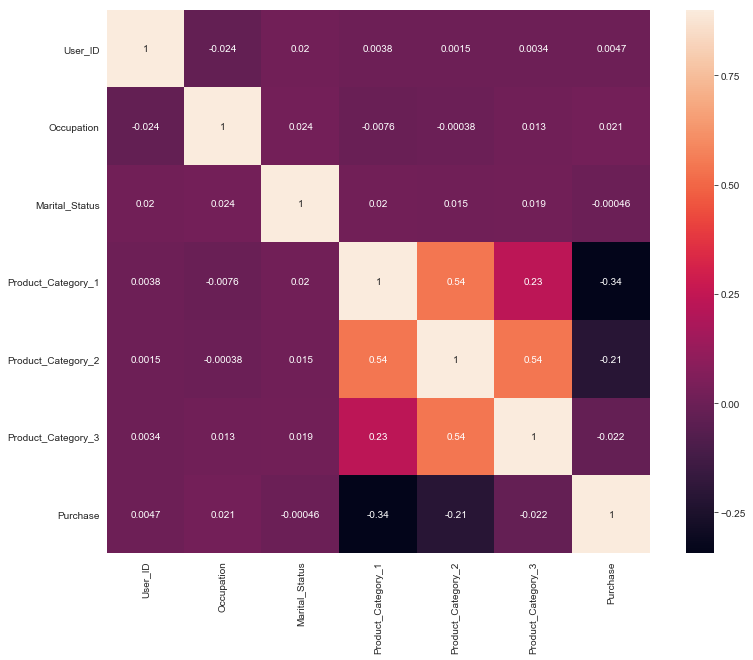

In [9]:
# visualising the correlation between the features
plt.figure(figsize=(13, 10))
cor = train.corr()
sns.heatmap(cor, vmax=0.9, annot=True, square=True)

- There's isn't any meaningful correlation between the features to take out 
- Only the Product Category features are seems to be related which is understandable

In [10]:
train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [11]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [12]:
# counting the number the users
print(train.User_ID.value_counts().count())

5891


In [13]:
# variety of products available in the storeprint(train.Product_ID.value_counts().count())
len(train.Product_ID.unique())

3631

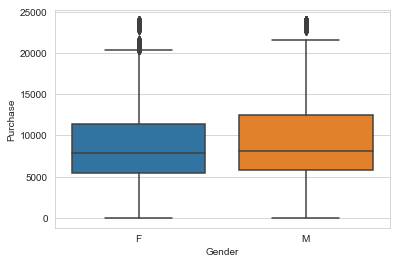

In [14]:
# gender against Purchase made
sns.boxplot(x=train.Gender, y=train.Purchase, data=train)

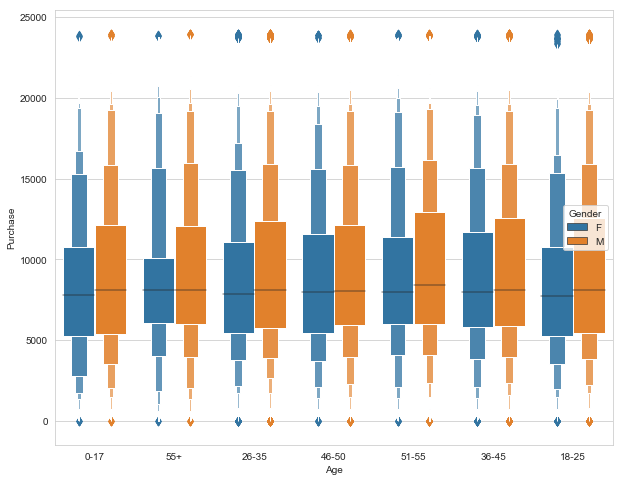

In [15]:
# boxenplot of Age and Purchase features
plt.figure(figsize=(10,8))
sns.boxenplot(x=train.Age, y=train.Purchase, data=train, hue=train.Gender)

In [16]:
# value counts product category 1
train.Product_Category_1.value_counts(dropna=False)

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category_1, dtype: int64

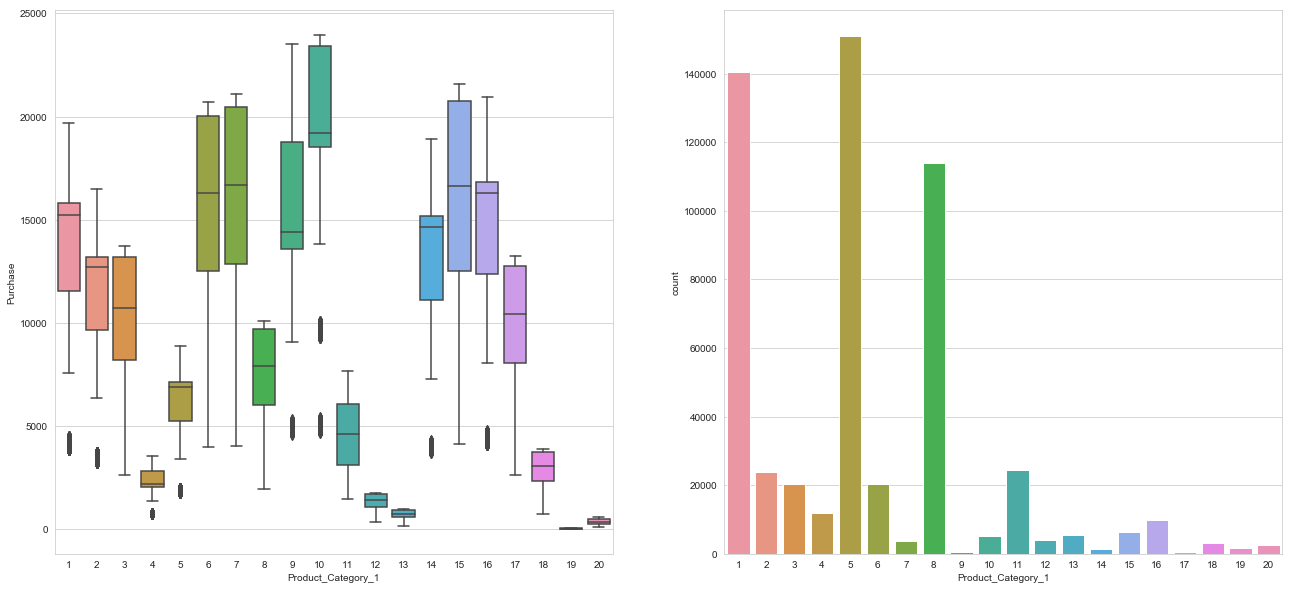

In [17]:
f, ax = plt.subplots(1,2, figsize = (22, 10))
sns.boxplot(x = train.Product_Category_1, y = train.Purchase, data = train, ax = ax[0])
sns.countplot(train.Product_Category_1, data = train, ax = ax[1])

In [18]:
train.Product_Category_1.unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19])

In [19]:
# Product Category 2
train.Product_Category_2.value_counts(dropna=False)

NaN      173638
 8.0      64088
 14.0     55108
 2.0      49217
 16.0     43255
 15.0     37855
 5.0      26235
 4.0      25677
 6.0      16466
 11.0     14134
 17.0     13320
 13.0     10531
 9.0       5693
 12.0      5528
 10.0      3043
 3.0       2884
 18.0      2770
 7.0        626
Name: Product_Category_2, dtype: int64

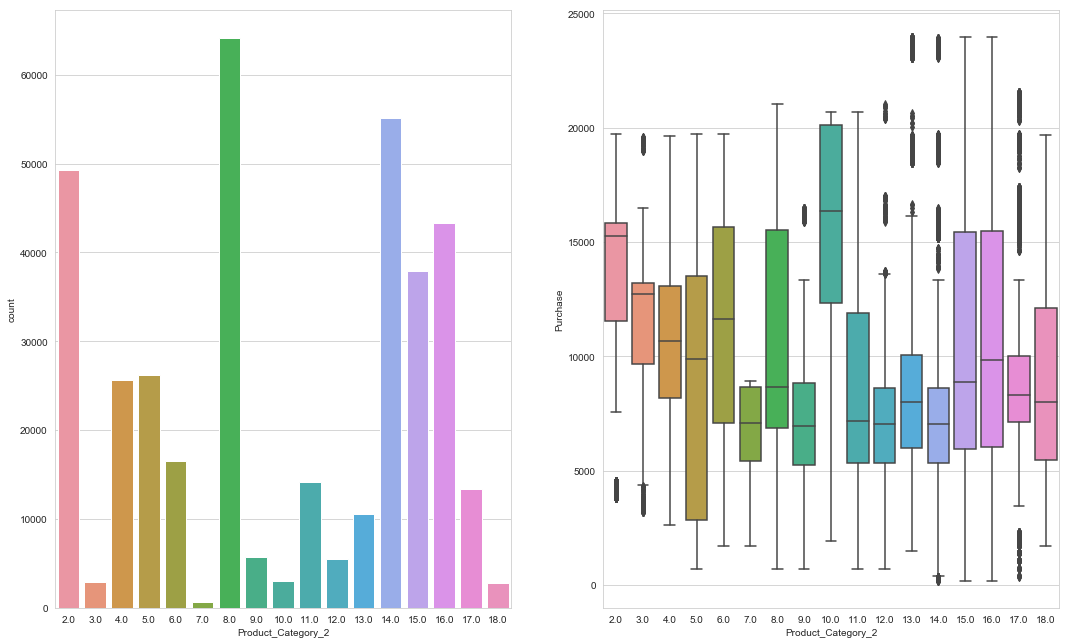

In [20]:
## Visualizing feature Product Category2 through subplots
f, ax = plt.subplots(1,2, figsize=(18,11))
sns.countplot(x = train.Product_Category_2, data = train, ax = ax[0])
sns.boxplot(x = train.Product_Category_2, y = train.Purchase, data = train, ax = ax[1])

In [21]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [22]:
train.Occupation.unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

In [23]:
train.Stay_In_Current_City_Years.unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

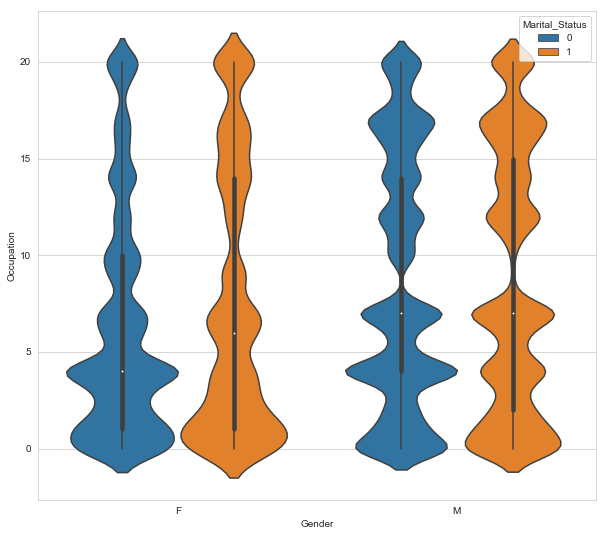

In [24]:
# checking occupation against gender
plt.figure(figsize=(10,9))
sns.violinplot(x=train.Gender, y=train.Occupation, hue=train.Marital_Status)

- Men are more occupated than women as the occupation increases
- Females accquire smaller occupation 

### Step 2
### Data Cleaning


 mu = 9263.97 and sigma = 5023.06


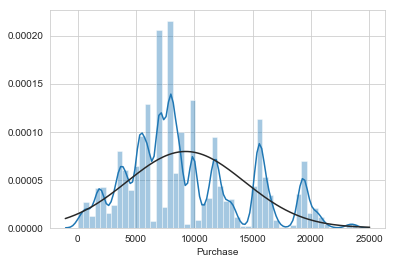

In [25]:
sns.distplot(train.Purchase, fit=norm)
(mu, sigma) = norm.fit(train.Purchase)
print( '\n mu = {:.2f} and sigma = {:.2f}'.format(mu, sigma))

In [26]:
train.Purchase1 = np.log1p(train.Purchase)
train.Purchase2 = np.log10(train.Purchase)
train.Purchase3 = np.log(train.Purchase)
train.Purchase4 = np.log2(train.Purchase)

In [27]:
train.Purchase5 = np.sqrt(train.Purchase)
train.Purchase6 = np.square(train.Purchase)


 mu = 8.94 and sigma = 0.74

 mu = 3.88 and sigma = 0.32

 mu = 8.94 and sigma = 0.74

 mu = 12.90 and sigma = 1.07

 mu = 92.33 and sigma = 27.20

 mu = 111052256.40 and sigma = 111972014.12


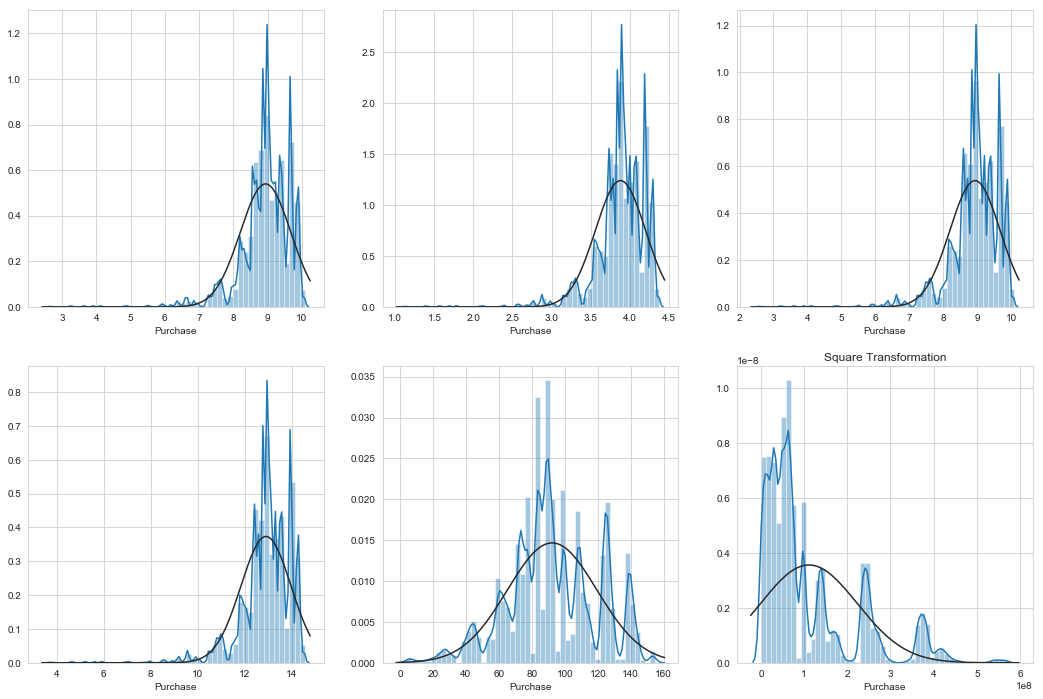

In [28]:
f,ax = plt.subplots(2,3, figsize=(18,12))

sns.distplot(train.Purchase1, fit=norm, ax=ax[0][0])
plt.gca().set_title('Log1p Transformation')
(mu, sigma) = norm.fit(train.Purchase1)
print( '\n mu = {:.2f} and sigma = {:.2f}'.format(mu, sigma))

sns.distplot(train.Purchase2, fit=norm, ax=ax[0][1])
plt.title('Log10 Transformation')
(mu, sigma) = norm.fit(train.Purchase2)
print( '\n mu = {:.2f} and sigma = {:.2f}'.format(mu, sigma))

sns.distplot(train.Purchase3, fit=norm, ax=ax[0][2])
plt.title('Log Transformation')
(mu, sigma) = norm.fit(train.Purchase3)
print( '\n mu = {:.2f} and sigma = {:.2f}'.format(mu, sigma))

sns.distplot(train.Purchase4, fit=norm, ax=ax[1][0])
plt.title('Log2 Transformation')
(mu, sigma) = norm.fit(train.Purchase4)
print( '\n mu = {:.2f} and sigma = {:.2f}'.format(mu, sigma))

sns.distplot(train.Purchase5, fit=norm, ax=ax[1][1])
plt.title('Sqrt Transformation')
(mu, sigma) = norm.fit(train.Purchase5)
print( '\n mu = {:.2f} and sigma = {:.2f}'.format(mu, sigma))

sns.distplot(train.Purchase6, fit=norm, ax=ax[1][2])
plt.title('Square Transformation')
(mu, sigma) = norm.fit(train.Purchase6)
print( '\n mu = {:.2f} and sigma = {:.2f}'.format(mu, sigma))

- From the above respective transformations , we can infer that the log10 transformation helps to reduce the mu and sigma transformations

In [29]:
## Taking best normalizing feature
train.Purchase = np.log10(train.Purchase)

### Step 3
### Feature Engineering

In [30]:
target = train.Purchase
train.drop('Purchase', 1, inplace=True)
data = train.append(test)

In [31]:
print(train.shape)
print(test.shape)
print(target.shape)
data.shape

(550068, 11)
(233599, 11)
(550068,)


(783667, 11)

- Product Category 1

In [32]:
## Reducing the classes of feature Product Category_1
data.Product_Category_1.replace({3:2, 17:2, 
                                  4:3, 12:3, 13:3, 20:3, 19:3,
                                  9:4, 6:4, 7:4, 15:4, 
                                  11:6, 
                                  18:7, 
                                  14:9, 16:9 }, inplace=True)

In [33]:
data.Product_Category_1.unique()

array([ 2,  1,  3,  8,  5,  4,  9,  6,  7, 10])

In [34]:
## Converting null values into a different category
data.Product_Category_2.fillna(1, inplace=True)

In [35]:
## Reducing the classes of feature Product Category_2
data.Product_Category_2.replace({6:3,
                                  7:6, 9:6, 12:6, 14:6,
                                  15:7, 16:7,
                                  13:9, 17:9,
                                  18:11}, inplace = True)

In [36]:
data.Product_Category_2.unique()

array([ 1.,  3.,  6.,  2.,  8.,  7., 11.,  5.,  4., 10.,  9.])

In [37]:
## Removing feature Product_Category_3 as it contains more nul values
data.drop('Product_Category_3', 1, inplace=True)

In [38]:
data.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
dtype: int64

- No null values left in the data

In [39]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN


In [40]:
# Gender 
data.replace({"Gender" : {'M':0, 'F':1}}, inplace=True)
data.Gender.unique()

array([1, 0])

In [41]:
# Age
data.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [42]:
data.replace({'Age':{"0-17":0, '18-25':1, '26-35':2, '36-45':3, '46-50':4, '51-55':5, '55+':6}}, inplace=True)
data.Age.unique()

array([0, 6, 2, 4, 5, 3, 1])

In [43]:
# City Category
data.replace({"City_Category" : {"A":0, "B":1, "C":2}}, inplace=True)
data.City_Category.unique()

array([0, 2, 1])

In [44]:
# Stay in Current City
data.Stay_In_Current_City_Years.replace({"4+":4}, inplace=True)
data.Stay_In_Current_City_Years = data.Stay_In_Current_City_Years.astype('int64')
data.Stay_In_Current_City_Years.unique()

array([2, 4, 3, 1, 0])

- All the data is refined and hence the conversion in needed for the categorical variable

In [45]:
from sklearn.preprocessing import LabelEncoder
features = ['User_ID', 'Product_ID']
for s in features:
    label = LabelEncoder()
    label.fit(list(data[s].values))
    data[s] = label.transform(list(data[s].values))

In [46]:
colms = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']

In [47]:
data = pd.get_dummies(data, columns=colms)

In [48]:
data.head()

,User_ID,Product_ID,Product_Category_1,Product_Category_2,Gender_0,Gender_1,Age_0,Age_1,Age_2,Age_3,...,City_Category_0,City_Category_1,City_Category_2,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4,Marital_Status_0,Marital_Status_1
0,0,684,2,1.0,0,1,1,0,0,0,...,1,0,0,0,0,1,0,0,1,0
1,0,2406,1,3.0,0,1,1,0,0,0,...,1,0,0,0,0,1,0,0,1,0
2,0,868,3,1.0,0,1,1,0,0,0,...,1,0,0,0,0,1,0,0,1,0
3,0,844,3,6.0,0,1,1,0,0,0,...,1,0,0,0,0,1,0,0,1,0
4,1,2769,8,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0


In [49]:
# dividing data into train and test
train = data[:train.shape[0]]
test = data[train.shape[0]:]

In [50]:
print(train.shape)
print(test.shape)
print(target.shape)

(550068, 44)
(233599, 44)
(550068,)


- Data is ready and let's proceed to Algorithm part

### Step 4 
### Algorithm Selection

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor



from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error

In [52]:
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.3, random_state=3)

In [54]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(385047, 44)
(385047,)
(165021, 44)
(165021,)


In [55]:
# using K FOLD
kf = KFold(n_splits=10, shuffle=True, random_state=12)

In [54]:
def crossVal(model):
    kf = KFold(n_splits=10, shuffle=True, random_state=12)
    score = - cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=kf, n_jobs=10)
    model_rmse = np.sqrt(score).mean()
    return model_rmse

In [57]:
# Linear Regression
lreg = LinearRegression(n_jobs=-1, fit_intercept=True, normalize=True)
score = crossVal(lreg)
score

0.31084006776460926

In [60]:
# Lasso
params = {'alpha': [.001, .005, .003], 'max_iter': [2,3,4]} 
laso = GridSearchCV(estimator=Lasso(), param_grid=params, cv=kf)
laso.fit(X_train, y_train)
pred = laso.predict(X_test)
laso_rmse = np.sqrt(mean_squared_error(y_test, pred))

In [61]:
laso.best_params_

{'alpha': 0.001, 'max_iter': 2}

In [62]:
laso_rmse

0.3088323323832506

In [63]:
# Elastic Net
params = {'alpha': [.001, .01, .1], 'max_iter': [2, 3, 4] } 
elnet = ElasticNet()
elasticNet = GridSearchCV(elnet, param_grid=params, cv=kf)
elasticNet.fit(X_train, y_train)
pred = elasticNet.predict(X_test)
elnet_rmse = np.sqrt(mean_squared_error(y_test, pred))

In [61]:
elasticNet.best_params_

{'alpha': 0.001, 'max_iter': 3}

In [62]:
elnet_rmse

0.30873016256475716

In [82]:
# DecisionTreeClassifier
para = {'max_depth' : [17, 18, 19], 'max_features' :[30, 31, 32, 33], 'random_state' : [5,12, 19]}
tree = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=para, cv=kf)
tree.fit(X_train, y_train)
pred = tree.predict(X_test)
tree_rmse = np.sqrt(mean_squared_error(y_test, pred))

In [83]:
tree.best_params_

In [68]:
tree_rmse

0.16322505248264654

In [79]:
# Gradient Boosting Regressor
boost = GridSearchCV(estimator = GradientBoostingRegressor(), param_grid = {'learning_rate':[.8, .9]}, cv=kf)
boost.fit(X_train, y_train)
pred = boost.predict(X_test)
boost_rmse = np.sqrt(mean_squared_error(y_test, pred))

In [80]:
boost.best_params_

{'learning_rate': 0.9}

In [81]:
boost_rmse

0.15562914382749832

In [57]:
# using pickle library to save our model
import pickle as pi

In [91]:
pi.dump(boost, open('model.sav', 'wb'))

#### Model Training on the test dataset

In [58]:
load_boost = pi.load(open('model.sav', 'rb'))

In [59]:
# Gradient Boosting
predictions = load_boost.predict(test)

In [60]:
# converting the predictions into the original scale
predictions = 10**predictions

### File Submission

In [64]:
file = pd.DataFrame()
file['User_ID'] = test_user_Id
file['Product_ID'] = test_product_Id
file['Purchase'] = predictions

In [65]:
file.head()

,User_ID,Product_ID,Purchase
0,1000004,P00128942,12240.752787
1,1000009,P00113442,13419.851364
2,1000010,P00288442,7226.734920
3,1000010,P00145342,1430.830452
4,1000011,P00053842,2285.236327


In [66]:
# making a csv
file.to_csv('boost.csv', index=False)